In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [2]:
numberOfOscillators = 4
numberOfCycles = 1000000

In [3]:
# numba.jit is a tool called Just-In-Time compilation and is used to make numpy code more efficient.
# It compiles the python code before running and can therefore save a lot of time.
# The way it is used here is as a function *decorator* telling python to optimize thet function.
# Try running the code without @numba.jit to see the performance differences.

@numba.jit
def NVE(numberOfOscillators, numberOfCycles, totalEnergy):
    initSteps = int(np.floor(0.5 * numberOfCycles))
    
    oscillator = np.zeros(numberOfOscillators, dtype=np.int32)
    distribution = np.zeros(totalEnergy+1, dtype=np.float32)

    # Distribute the total energy among oscillators
    for energy in range(totalEnergy):
        oscillator[energy % numberOfOscillators] += 1

    print(f"Initial energy {oscillator.sum()}")

    for cycle in range(numberOfCycles):
        for _ in range(numberOfOscillators):
            # Select two particles
            oscA, oscB = np.random.choice(numberOfOscillators, 2, replace=False)
            
            # Choose a random exchange direction
            flip = -1 if np.random.rand() < 0.5 else 1
            
            # If energy will not go negative, accept exchange
            if min(oscillator[oscA] + flip, oscillator[oscB] - flip) >= 0.0:
                oscillator[oscA] += flip
                oscillator[oscB] -= flip

        # Update the distribution after half the cycles
        if cycle > initSteps:
            distribution[oscillator[0]] += 1
    
    print(f"Final energy {oscillator.sum()}")
    return distribution / distribution.sum()


@numba.jit
def find_last_nonzero_index(arr):
    for i in range(len(arr) - 1, -1, -1):
        if arr[i] != 0:
            return i + 1  # Add 1 to match the original logic
    return 0  # If all elements are zero

@numba.jit
def NVT(numberOfOscillators, numberOfCycles, beta):
    initSteps = int(np.floor(0.5 * numberOfCycles))
    oscillator = np.zeros(numberOfOscillators, dtype=np.int32)
    distribution = np.zeros(1000000, dtype=np.int32)
    
    print(f"Initial energy {oscillator.sum()}")
    for cycle in range(numberOfCycles):
        for _ in range(numberOfOscillators):
            # Select a particle
            oscA = np.random.choice(numberOfOscillators, 1)
            
            # Choose a random exchange direction
            flip = -1 if np.random.rand() < 0.5 else 1
            
            # accept according to Metropolis criterium
            if oscillator[oscA] + flip >= 0 and np.random.rand() < np.exp(-beta * flip):
                oscillator[oscA] += flip  
            
    
        # Update the distribution after half the cycles
        if cycle > initSteps:
            distribution[oscillator[0]] += 1
            
    # Trim trailing zeros
    k = find_last_nonzero_index(distribution)
    distribution = distribution[:k]
            
    print(f"Final energy {oscillator.sum()}")
    return distribution / distribution.sum()

Initial energy 1000
Final energy 1000


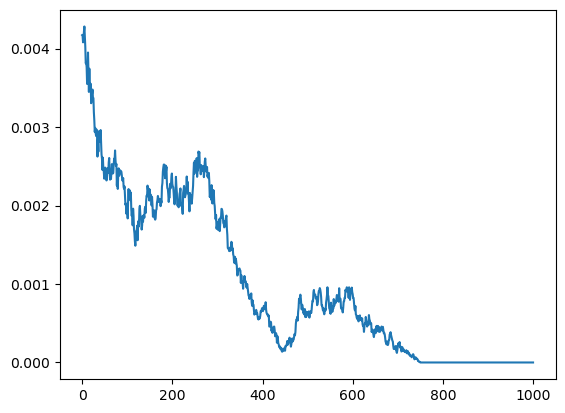

In [4]:
fig, ax = plt.subplots()

totalEnergy = 1000
ax.plot(NVE(numberOfOscillators, numberOfCycles, totalEnergy))

Initial energy 0
Final energy 2032
Initial energy 0
Final energy 5240
Initial energy 0
Final energy 2640
Initial energy 0
Final energy 2461
Initial energy 0
Final energy 2638


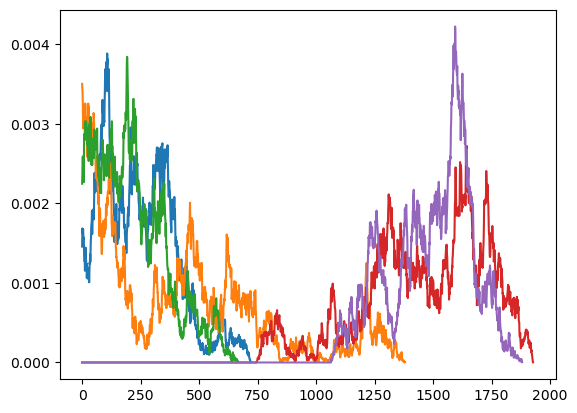

In [5]:
fig, ax = plt.subplots()

beta = 0.0001
for _ in range(5):
    ax.plot(NVT(numberOfOscillators, numberOfCycles, beta))